# Import Packages dan Dataset

In [ ]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connect Gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ganti dengan path lengkap ke file CSV Anda di Google Drive
file_path = '/content/drive/My Drive/Final_Project_DS46/marketing_campaign.csv'

# Membaca CSV
df = pd.read_csv(file_path,sep=";")

In [ ]:
# Cek data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Cek data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Intepretasi
 Dt Customer memiliki Dtype Object. Seharusnya diubah menjadi datetime.

In [ ]:
# Mengubah kolom Dt_Customer menjadi dtype datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
# Menghapus Fitur Z_CostContact dan Z_Revenue
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274


In [ ]:
# Membagi data numerik dan kategorik
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

# Data Cleansing

## A. Handle Missing Value

In [ ]:
# Menghitung Jumlah missing value tiap fitur
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


### Intepretasi
terdapat 24 data missing pada kolom Income selajutnya missing data sebaiknya dihapus saja.

In [ ]:
# Hitung jumlah baris dataset
df.shape[0]

2240

In [ ]:
# Drop missing value
df.dropna(inplace=True)

In [ ]:
# Hitung kembali jumlah baris
df.shape[0]

2216

Tersisa 2216 baris data setelah menghapus data missing values.

## B. Handle Data Duplicates

In [ ]:
# Cek apakah ada data duplikat
df.duplicated().any()

False

### Intepretasi

Tidak ada data duplicate dalam data set sehingga proses data cleansing dapat langsung dilanjutkan

## C. Handling Outliers

In [ ]:
# List nama kolom numerik
nums = list(df_num.columns)

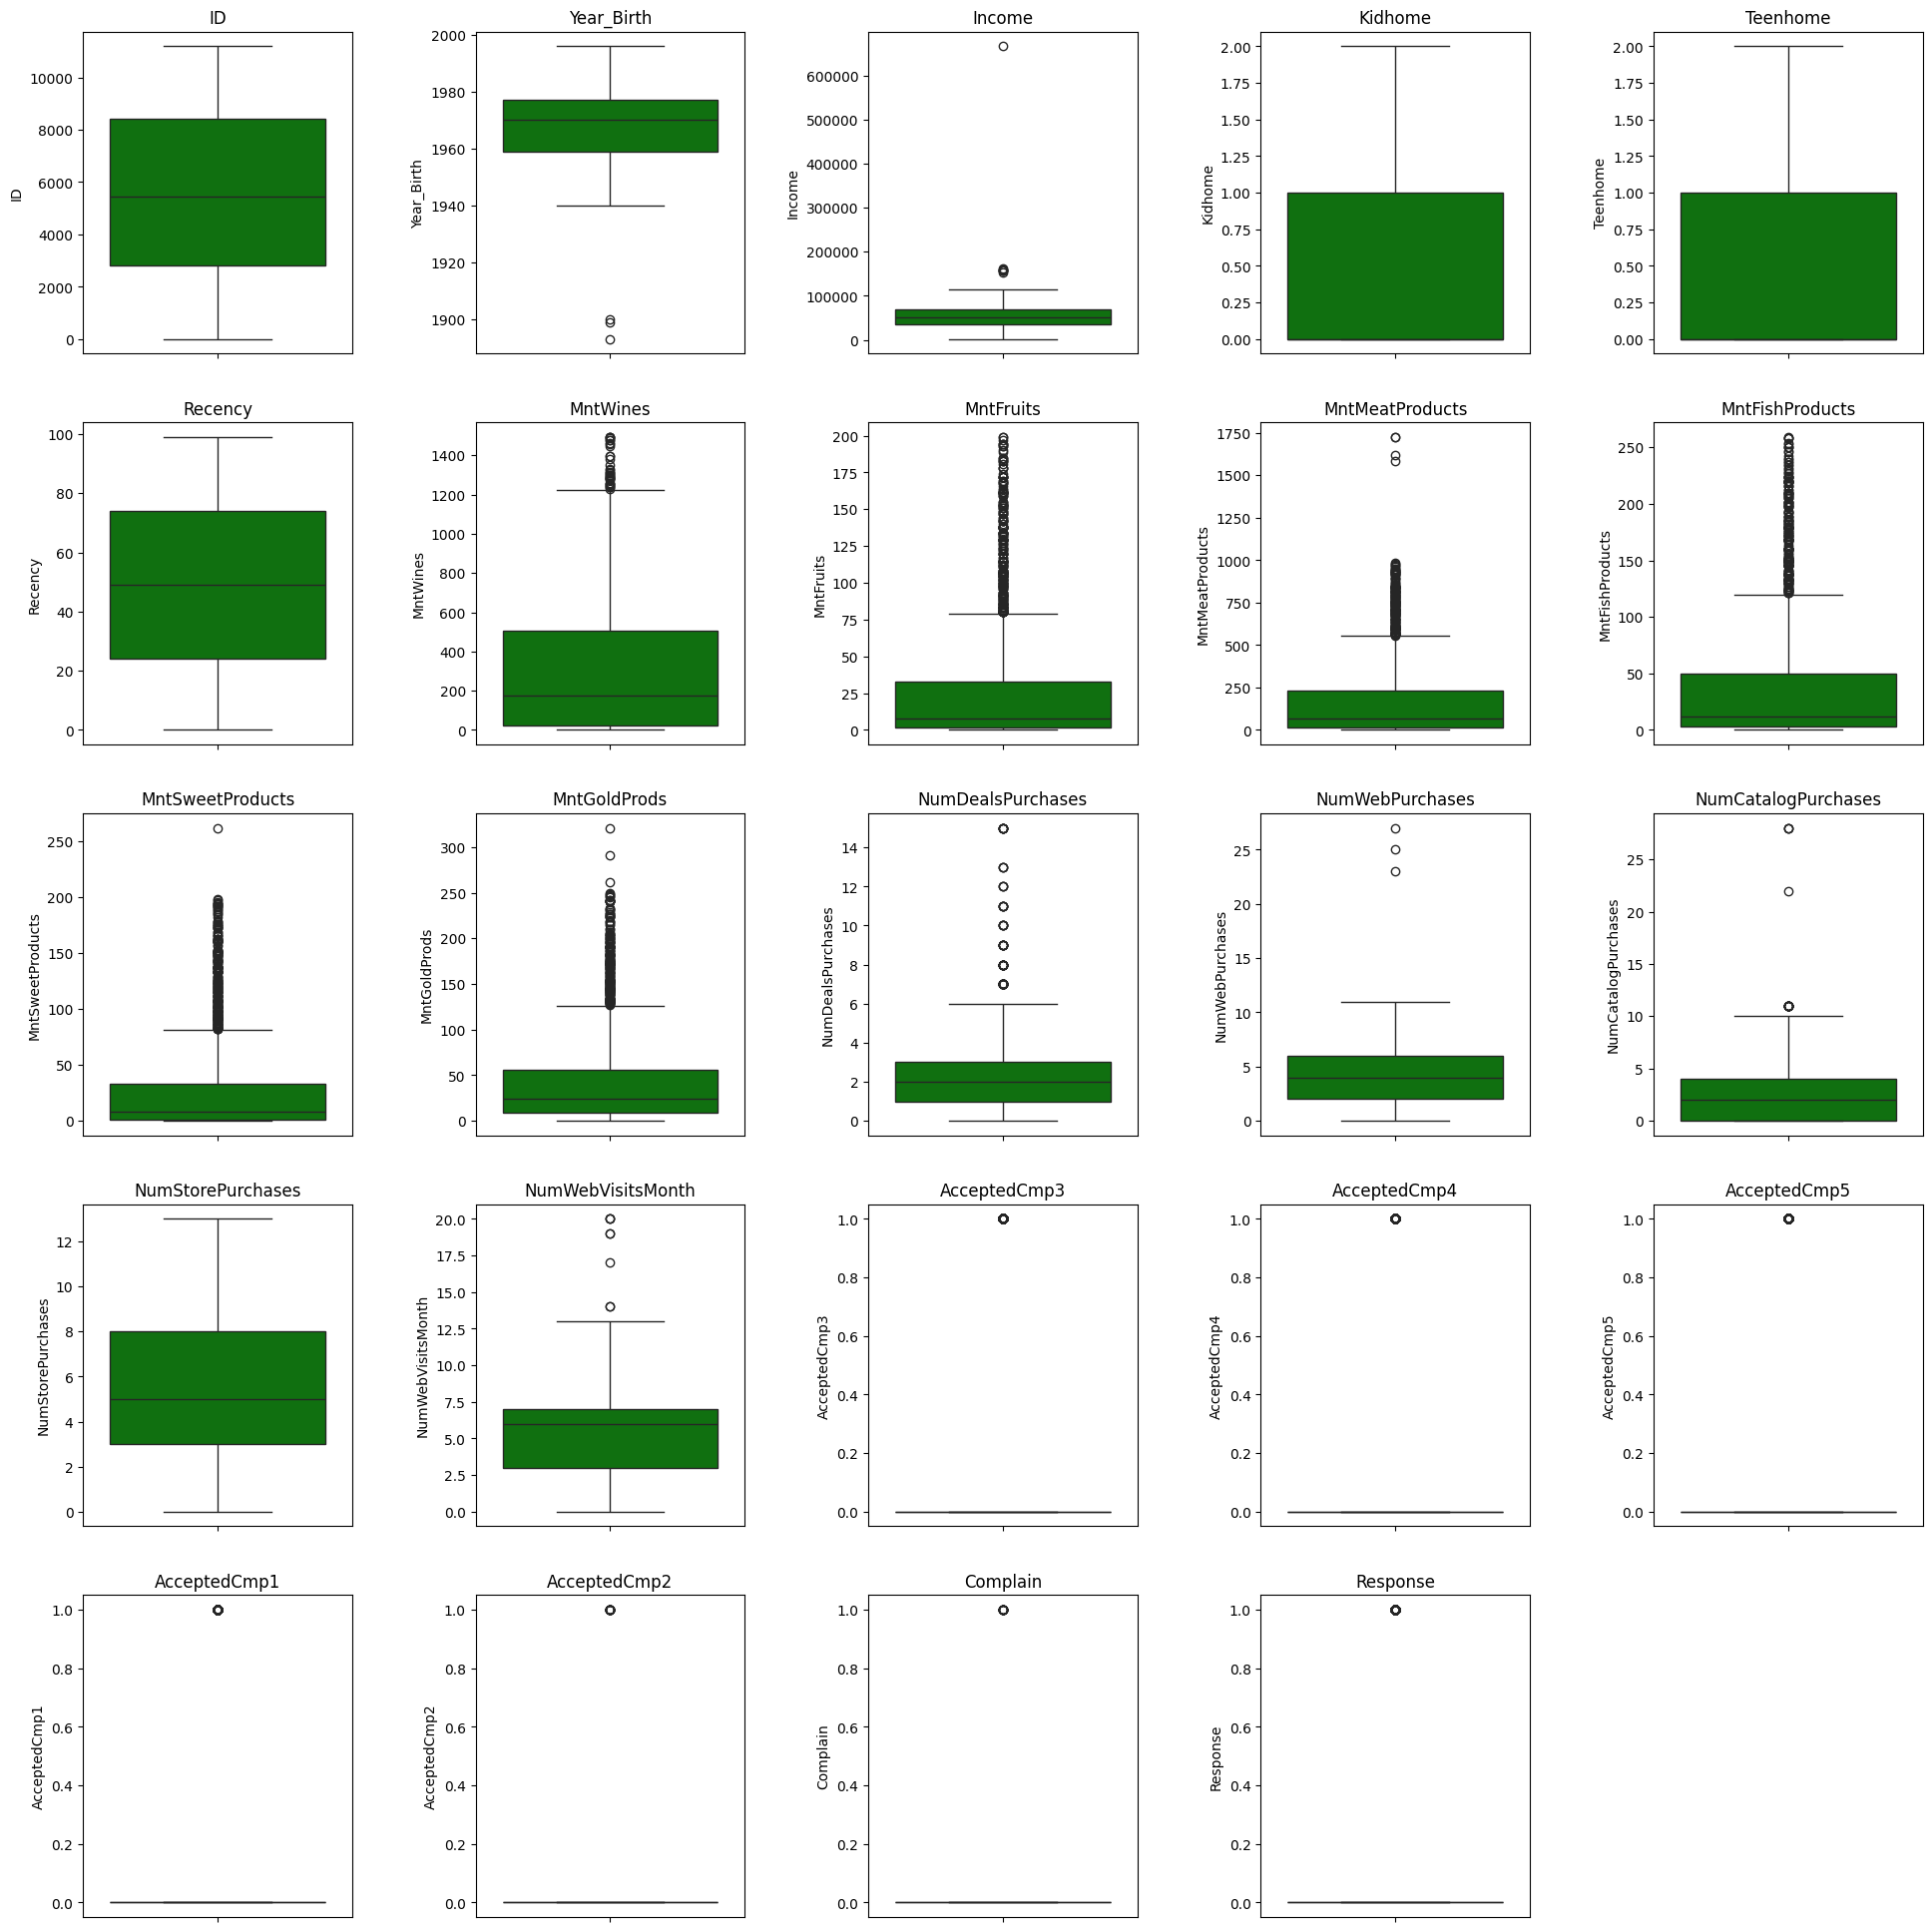

In [ ]:
# Ukuran subplot
n_cols = 5
n_rows = (len(nums) + n_cols - 1) // n_cols  # Pembulatan ke atas untuk memastikan semua kolom ditampilkan

# Membuat figure dengan ukuran yang lebih besar
plt.figure(figsize=(20, 4 * n_rows))

for i, column in enumerate(nums):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=df[column], color='green', orient='v')
    plt.title(column)  # Menambahkan judul untuk masing-masing boxplot
    plt.tight_layout(pad=3.0)  # Mengatur jarak antar subplot

# Menampilkan grafik
plt.show()

Terlihat dari grafik boxplot terdapat banyak Outlier pada berbagai kolom. Selanjutnya Outlier akan ditangani dengan metode IQR dan z-test. Metode z-test akan dilakukan setelah transformasi data.

### Handle Outlier Metode IQR

In [ ]:
df_clean_IQR = df.copy()
# Remove rows containing outliers
initial_data_size = df_clean_IQR.shape[0]

# Iterasi melalui setiap kolom di dalam nums untuk menghapus outliers
for column in nums:
    Q1 = df_clean_IQR[column].quantile(0.25)
    Q3 = df_clean_IQR[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definisikan batas outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update data dengan menghapus outliers
    df_clean_IQR = df_clean_IQR[(df_clean_IQR[column] >= lower_bound) & (df_clean_IQR[column] <= upper_bound)]

# Ukuran data setelah filter
remaining_data_size = df_clean_IQR.shape[0]
rows_removed = initial_data_size - remaining_data_size

# Menampilkan hasil
print(f'Jumlah data sebelum filter: {initial_data_size}')
print(f'Jumlah data setelah filter: {remaining_data_size}')
print(f'Jumlah baris yang dihapus: {rows_removed}')


Jumlah data sebelum filter: 2216
Jumlah data setelah filter: 828
Jumlah baris yang dihapus: 1388


Jumlah baris data setelah menghapus outlier dengan metode IQR adalah 1388. Jumlah Outlier yang terdeteksi dengan metode ini adalah 828 data.

## D. Feature Trasnformation

### Analisis Distribusi Fitur

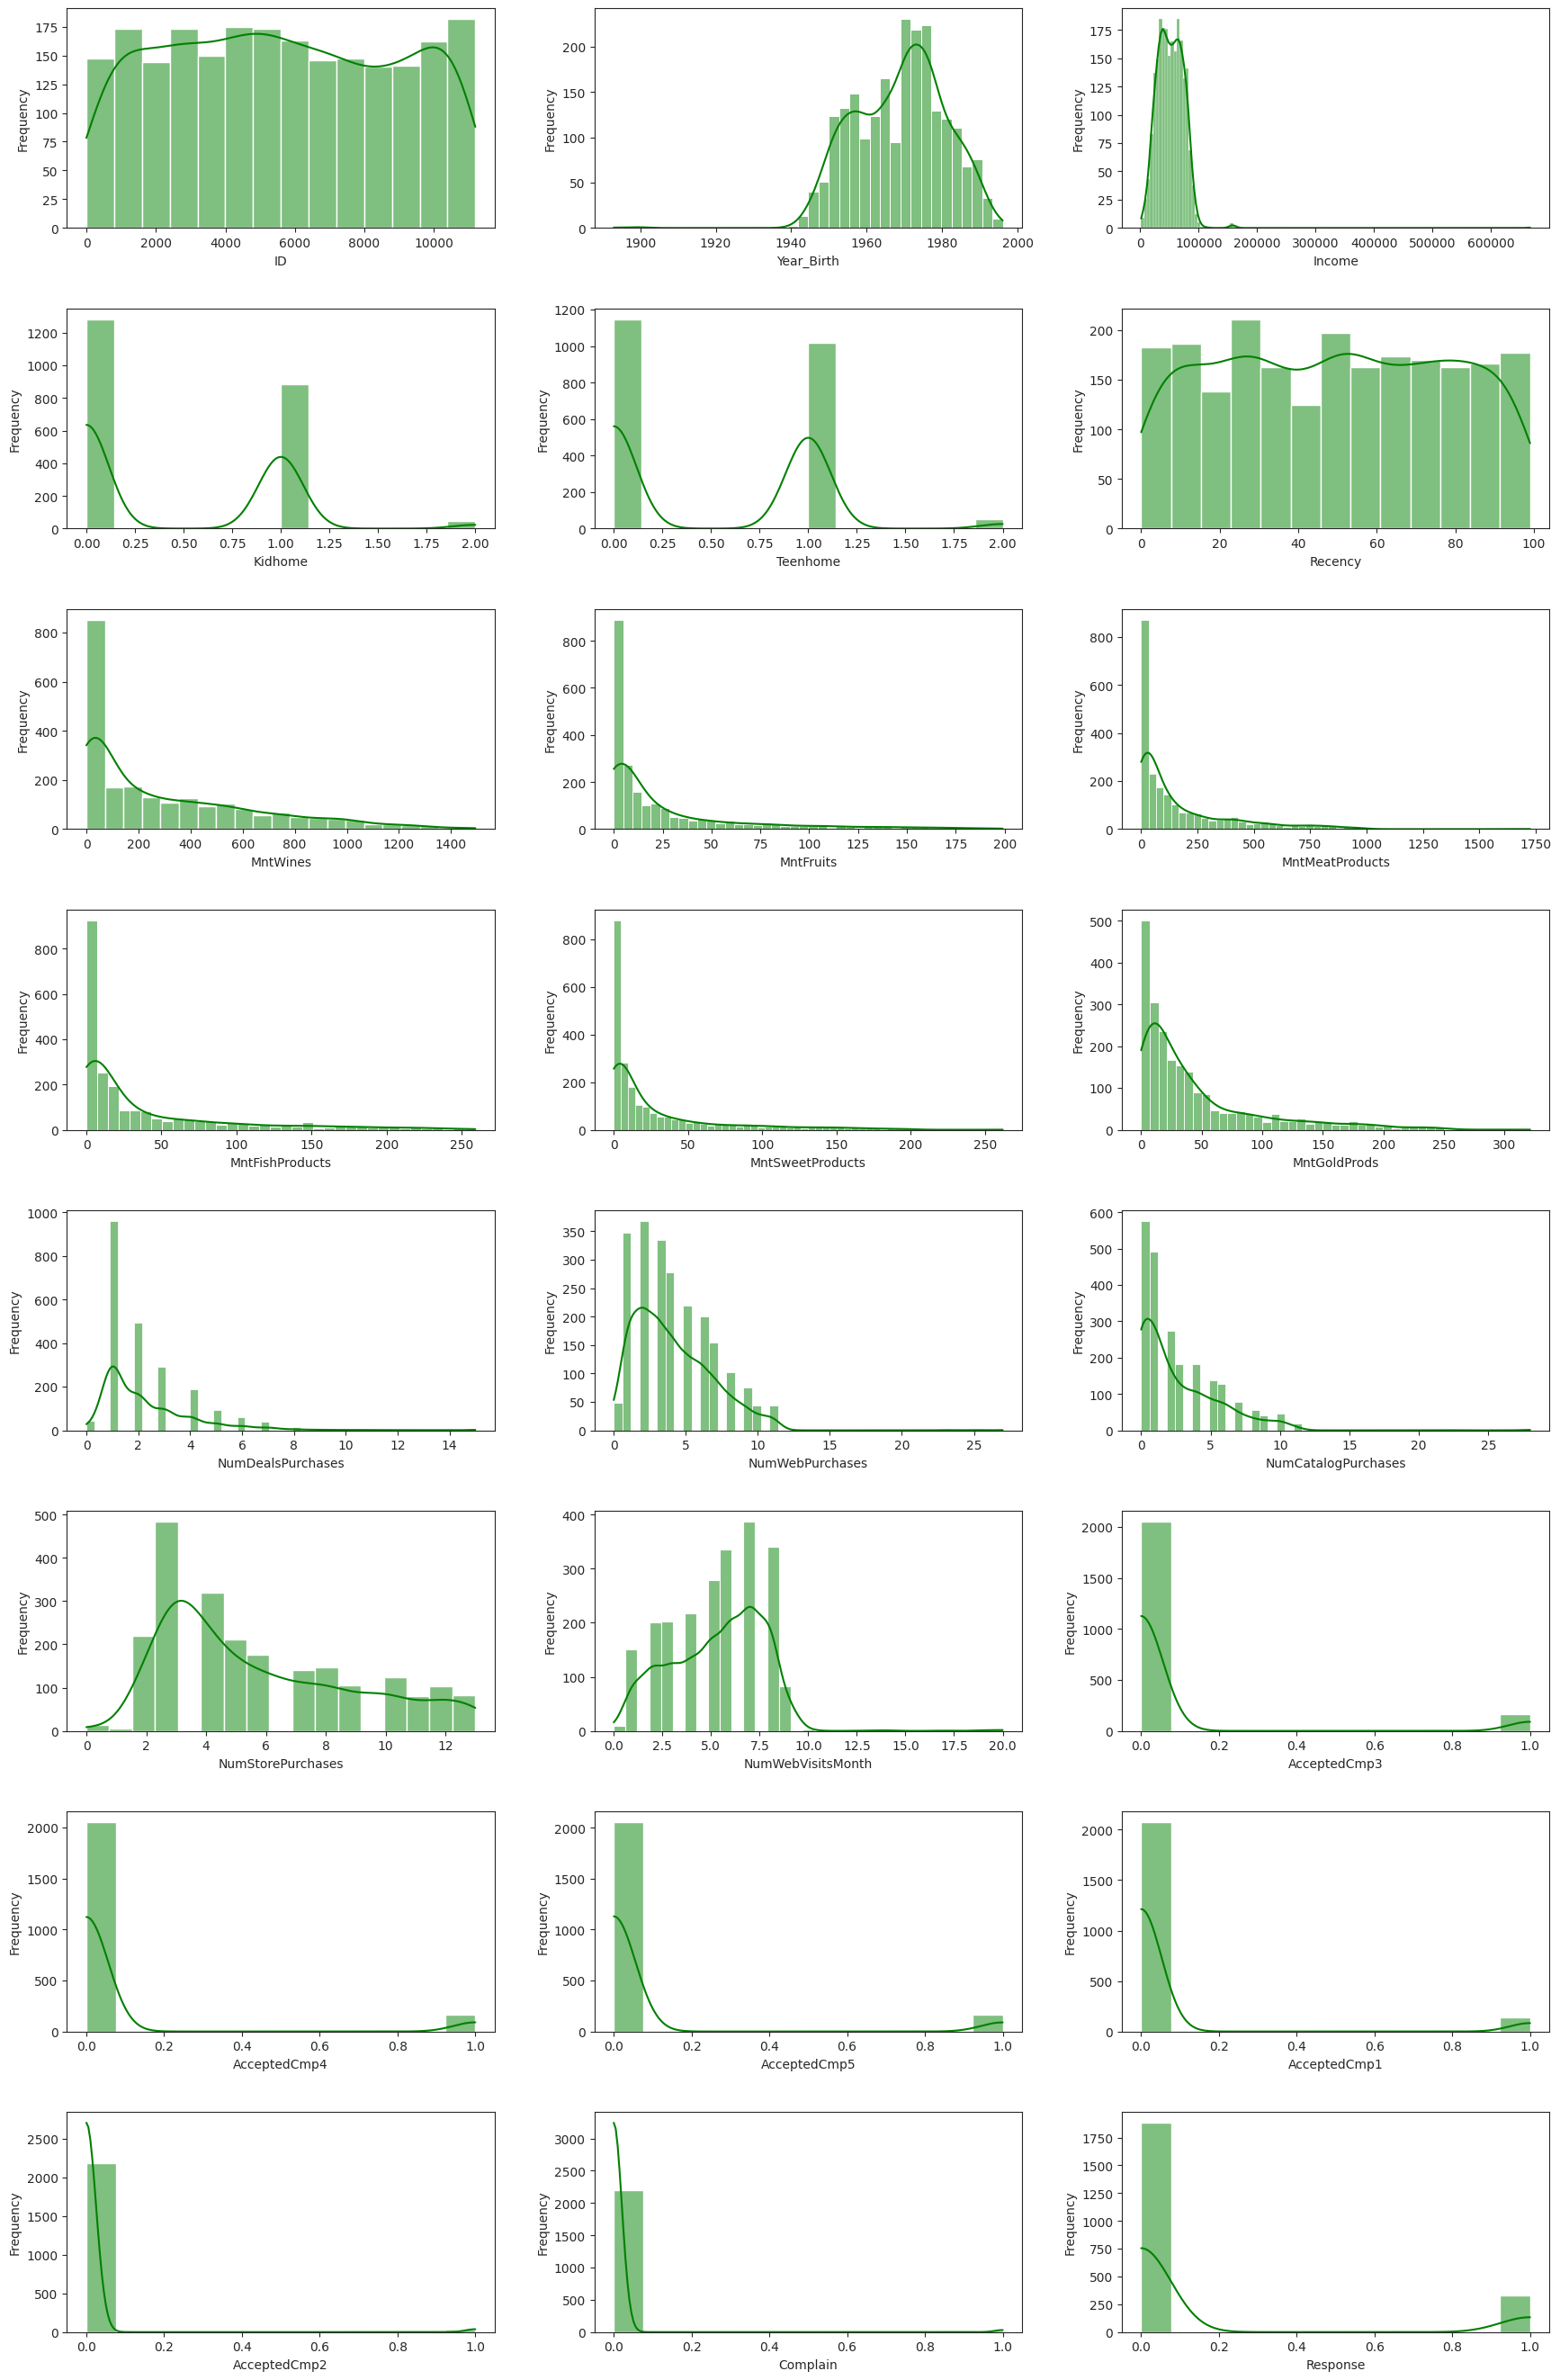

In [ ]:
# Set style
sns.set_style("ticks")

# Menyiapkan figur dengan ukuran yang lebih besar untuk memastikan kejelasan
plt.figure(figsize=(18, 30))  # Adjust the size based on your dataset and the number of subplots

# Create a subplot for each numerical feature
for i, col in enumerate(nums):
    plt.subplot(9, 3, i+1)  # 9x3 layout is suitable for up to 27 subplots
    sns.histplot(x=df[col], color='green', kde=True)  # Adding Kernel Density Estimate (KDE)
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to make sure everything fits without overlapping
plt.tight_layout(pad=3.0)  # You can adjust padding to find what works best for your figures

# Display the plots
plt.show()

Terlihat dari grafik di atas terdapat banyak kolom yang memiliki distribusi positive skewed, sehingga sebaiknya menggunakan metode log transform untuk transformasi data.

In [ ]:
# Fitur dengan distribusi Skewed
skewed = ["Year_Birth","Income","Kidhome","Teenhome","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]

# LogTransform fitur skewed
df_normal = df.copy()
for col in skewed:
    df_normal[col] = np.log1p(df_normal[col])

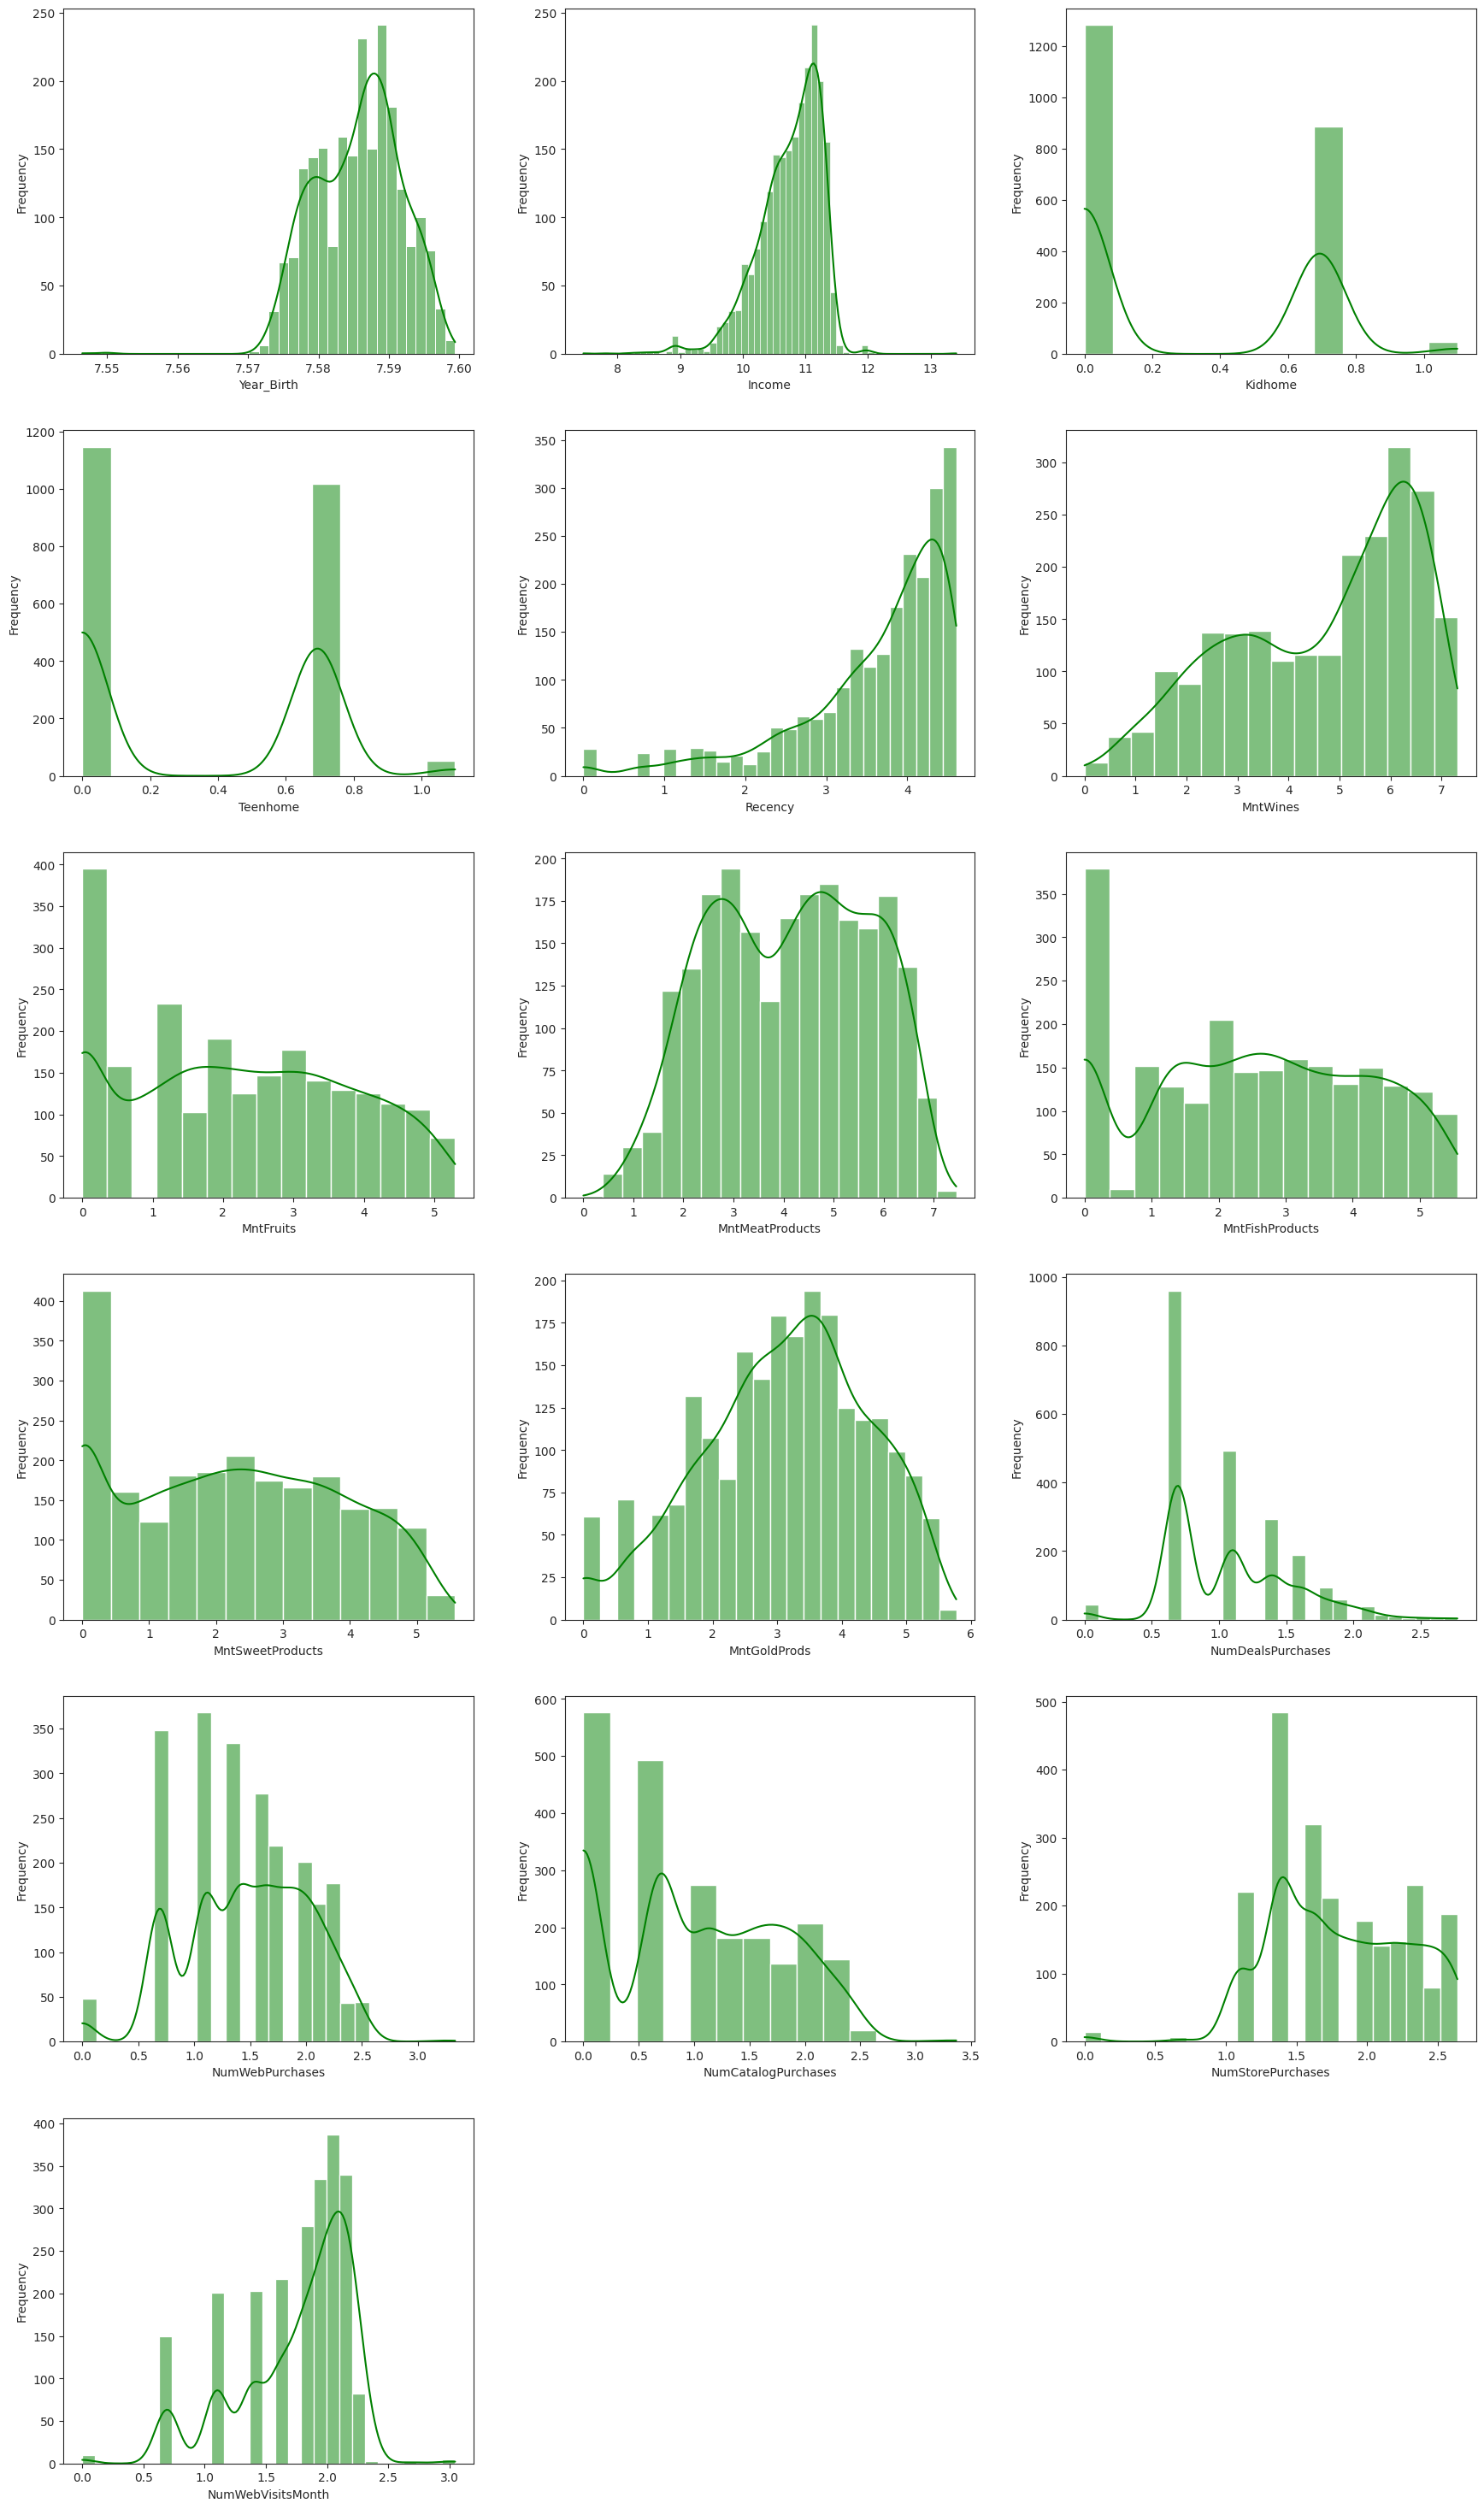

In [ ]:
# Set style
sns.set_style("ticks")

# Menyiapkan figur dengan ukuran yang lebih besar untuk memastikan kejelasan
plt.figure(figsize=(18, 30))  # Adjust the size based on your dataset and the number of subplots

# Create a subplot for each numerical feature
for i, col in enumerate(skewed):
    plt.subplot(6, 3, i+1)  # 9x3 layout is suitable for up to 27 subplots
    sns.histplot(x=df_normal[col], color='green', kde=True)  # Adding Kernel Density Estimate (KDE)
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to make sure everything fits without overlapping
plt.tight_layout(pad=3.0)  # You can adjust padding to find what works best for your figures

# Display the plots
plt.show()

## Handling Outlier Metode z-test

In [ ]:
# Metode Z-test
from scipy import stats

# Detect outliers using Z Score
df_clean_ztest = df_normal[skewed].copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(df_clean_ztest)}')

filtered_entries = np.array([True] * len(df_clean_ztest))

for col in df_clean_ztest.columns:
    zscore = abs(stats.zscore(df_clean_ztest[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df2 = df_clean_ztest[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

baris_dihapus = len(df_clean_ztest) - len(df2)
print(f'Jumlah baris yang dihapus: {baris_dihapus}')

Jumlah baris sebelum memfilter outlier: 2216
Jumlah baris setelah memfilter outlier: 2115
Jumlah baris yang dihapus: 101


Menggunakan hasil metode z-test sebagai df_clean jumlah outlier yang didetetksi adalah 101 sehingga jumlah data tersisa adalah 2115 baris.


In [ ]:
# Membuat df_clean
df_clean = df.copy()
df_clean[skewed] = df2
df_clean.dropna(inplace=True)
df_clean.shape[0]

2115

## E. Label Encoding

In [ ]:
# Show Cat data
df_cat.head()

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married


In [ ]:
df_clean["Education"].value_counts()

,count
Education,
Graduation,1074
PhD,457
Master,351
2n Cycle,184
Basic,49


In [ ]:
df_clean["Marital_Status"].value_counts()

,count
Marital_Status,
Married,820
Together,552
Single,442
Divorced,221
Widow,73
Alone,3
Absurd,2
YOLO,2


## One Hot Encoding
Kolom kategorik memiliki distinct value lebih dari dua sehingga Proses Encoding lebih baik menggunakan metode One-Hot encoding.

In [ ]:
# Mengganti Alone pada marital status dengan single
df_clean["Marital_Status"].replace("Alone","Single",inplace=True)
# Hapus baris dengan Marital_Status = Absurd atau Yolo
df_clean = df_clean[~df_clean['Marital_Status'].isin(['Absurd', 'YOLO'])]

In [ ]:
df_clean["Marital_Status"].value_counts()

,count
Marital_Status,
Married,820
Together,552
Single,445
Divorced,221
Widow,73


In [ ]:
# Mengasumsikan df sudah ada dan sudah di-mapped
# Menerapkan One Hot Encoding
df_education_one_hot = pd.get_dummies(df_clean['Education'], prefix='Edu')
df_marital_one_hot = pd.get_dummies(df_clean['Marital_Status'], prefix='Marital')

# Menampilkan hasil One Hot Encoding
print(df_education_one_hot.head())
print(df_marital_one_hot.head())

   Edu_2n Cycle  Edu_Basic  Edu_Graduation  Edu_Master  Edu_PhD
0         False      False            True       False    False
1         False      False            True       False    False
2         False      False            True       False    False
3         False      False            True       False    False
4         False      False           False       False     True
   Marital_Divorced  Marital_Married  Marital_Single  Marital_Together  \
0             False            False            True             False   
1             False            False            True             False   
2             False            False           False              True   
3             False            False           False              True   
4             False             True           False             False   

   Marital_Widow  
0          False  
1          False  
2          False  
3          False  
4          False  


In [ ]:
# Gabungkan One Hot Encoding kembali ke DataFrame asli
df_clean = df_clean.join(df_education_one_hot)
df_clean = df_clean.join(df_marital_one_hot)

# Menampilkan beberapa baris dari DataFrame yang sudah diperbarui
df_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Edu_2n Cycle,Edu_Basic,Edu_Graduation,Edu_Master,Edu_PhD,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow
0,5524,7.579679,Graduation,Single,10.970592,0.000000,0.000000,2012-09-04,4.077537,6.455199,...,False,False,True,False,False,False,False,True,False,False
1,2174,7.578145,Graduation,Single,10.743869,0.693147,0.693147,2014-03-08,3.663562,2.484907,...,False,False,True,False,False,False,False,True,False,False
2,4141,7.583756,Graduation,Together,11.179046,0.000000,0.000000,2013-08-21,3.295837,6.056784,...,False,False,True,False,False,False,False,False,True,False
3,6182,7.593374,Graduation,Together,10.190432,0.693147,0.000000,2014-02-10,3.295837,2.484907,...,False,False,True,False,False,False,False,False,True,False
4,5324,7.591862,PhD,Married,10.973254,0.693147,0.000000,2014-01-19,4.553877,5.159055,...,False,False,False,False,True,False,True,False,False,False


DF Clean Telah Berhasil diencoding

## Data Splitting


In [ ]:
# Membuat list fitur prediktor
x = list(df.columns)
x.remove('Response')
x.remove('ID')

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    df_clean[x],  # Fitur
    df_clean['Response'],  # Target
    test_size=0.3,  # Proporsi data test adalah 30%
    random_state=42  # Mengatur seed untuk hasil yang konsisten
)

# Tampilkan ukuran setiap set
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (1477, 25)
Ukuran X_test: (634, 25)
Ukuran y_train: (1477,)
Ukuran y_test: (634,)


Dataset df displit menjadi data train dan data test dengan proporsi 30% data test dan 70% data train.

## Data Scalling

In [ ]:
# Remove ID dan Response dari list nums
nums.remove('ID')
nums.remove('Response')

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardisasi X_train
scaler = StandardScaler()
X_train_scaled_nums = scaler.fit_transform(X_train[nums])
X_test_scaled_nums = scaler.transform(X_test[nums])

# Memasukkan hasil standardisasi fitur numerik kedalam X_train dan X_test
X_train[nums] = X_train_scaled_nums
X_test[nums] = X_test_scaled_nums

scalling dengan standardisasi (standardscaller) pada data X_train dan X_test fitur numerik. lalu memasukkan hasil standardisasi kembali kedalam X_train dan X_test.

## F. Class Imbalance

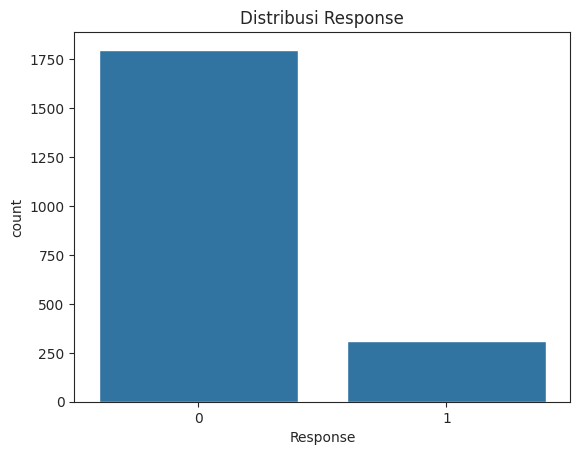

In [ ]:
sns.countplot(x='Response', data=df_clean)
plt.title("Distribusi Response")
plt.show()

In [ ]:
# Menghitung jumlah masing-masing value response
df_response = df_clean.pivot_table(index='Response', values='ID', aggfunc='count').reset_index()
df_response['Percentage'] = (df_response['ID'] / df_response['ID'].sum()) * 100
df_response

,Response,ID,Percentage
0,0,1799,85.220275
1,1,312,14.779725


### Intepretasi:
Terdapat class imbalance pada kolom target yang signifikan. Untuk menangani hal ini kami memilih menggunakan metode Kombinasi oversampling dan Undersampling. Data Minority akan di upsample terlebih dahulu hingga sekitar sebesar 70% data majority lalu data majority akan di undersampling hingga jumlah data sama.

### Oversampling dengan SMOTE

In [ ]:
# Import Packages
from imblearn.over_sampling import SMOTE
from collections import Counter

# SMOTE dengan oversampling minoritas hingga 60% dari mayoritas
smote = SMOTE(sampling_strategy=0.7)

# Melakukan oversampling dengan SMOTE
X_over, y_over = smote.fit_resample(X_train[nums], y_train)

# Melihat distribusi kelas setelah SMOTE
print(f"Distribusi kelas sebelum SMOTE: {Counter(y_train)}")
print(f"Distribusi kelas setelah SMOTE: {Counter(y_over)}")

Distribusi kelas sebelum SMOTE: Counter({0: 1270, 1: 207})
Distribusi kelas setelah SMOTE: Counter({0: 1270, 1: 889})


In [ ]:
# Menghitung jumlah masing-masing value response
df_response_ovr = y_over.value_counts().reset_index()
df_response_ovr.columns = ['Response', 'Count']
df_response_ovr['Percentage'] = (df_response_ovr['Count'] / df_response_ovr['Count'].sum()) * 100
df_response_ovr

,Response,Count,Percentage
0,0,1270,58.823529
1,1,889,41.176471


Presentase Response 1 dan 0 sudah sebesar kurang lebih 60-40%

### UnderSampling dengan RandomUnderSampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Melakukan undersampling agar kelas mayoritas dan minoritas seimbang
under_sampler = RandomUnderSampler(sampling_strategy=1.0)  # 1.0 berarti mayoritas dan minoritas seimbang

# Melakukan undersampling
X_res, y_res = under_sampler.fit_resample(X_over, y_over)

# Melihat distribusi kelas setelah undersampling
print(f"Distribusi kelas setelah undersampling: {Counter(y_res)}")

Distribusi kelas setelah undersampling: Counter({0: 889, 1: 889})


Jumlah data sudah sama setalah melakukan kombinasi oversampling SMOTE dan random under sampling. Jumlah data seimbang pada 889 data.

In [ ]:
# Menggunakan data yang sudah balance sebagai X_train dan Y_train
X_train = X_res
y_train = y_res

# 2. Feature Engineering

## Feature Selection

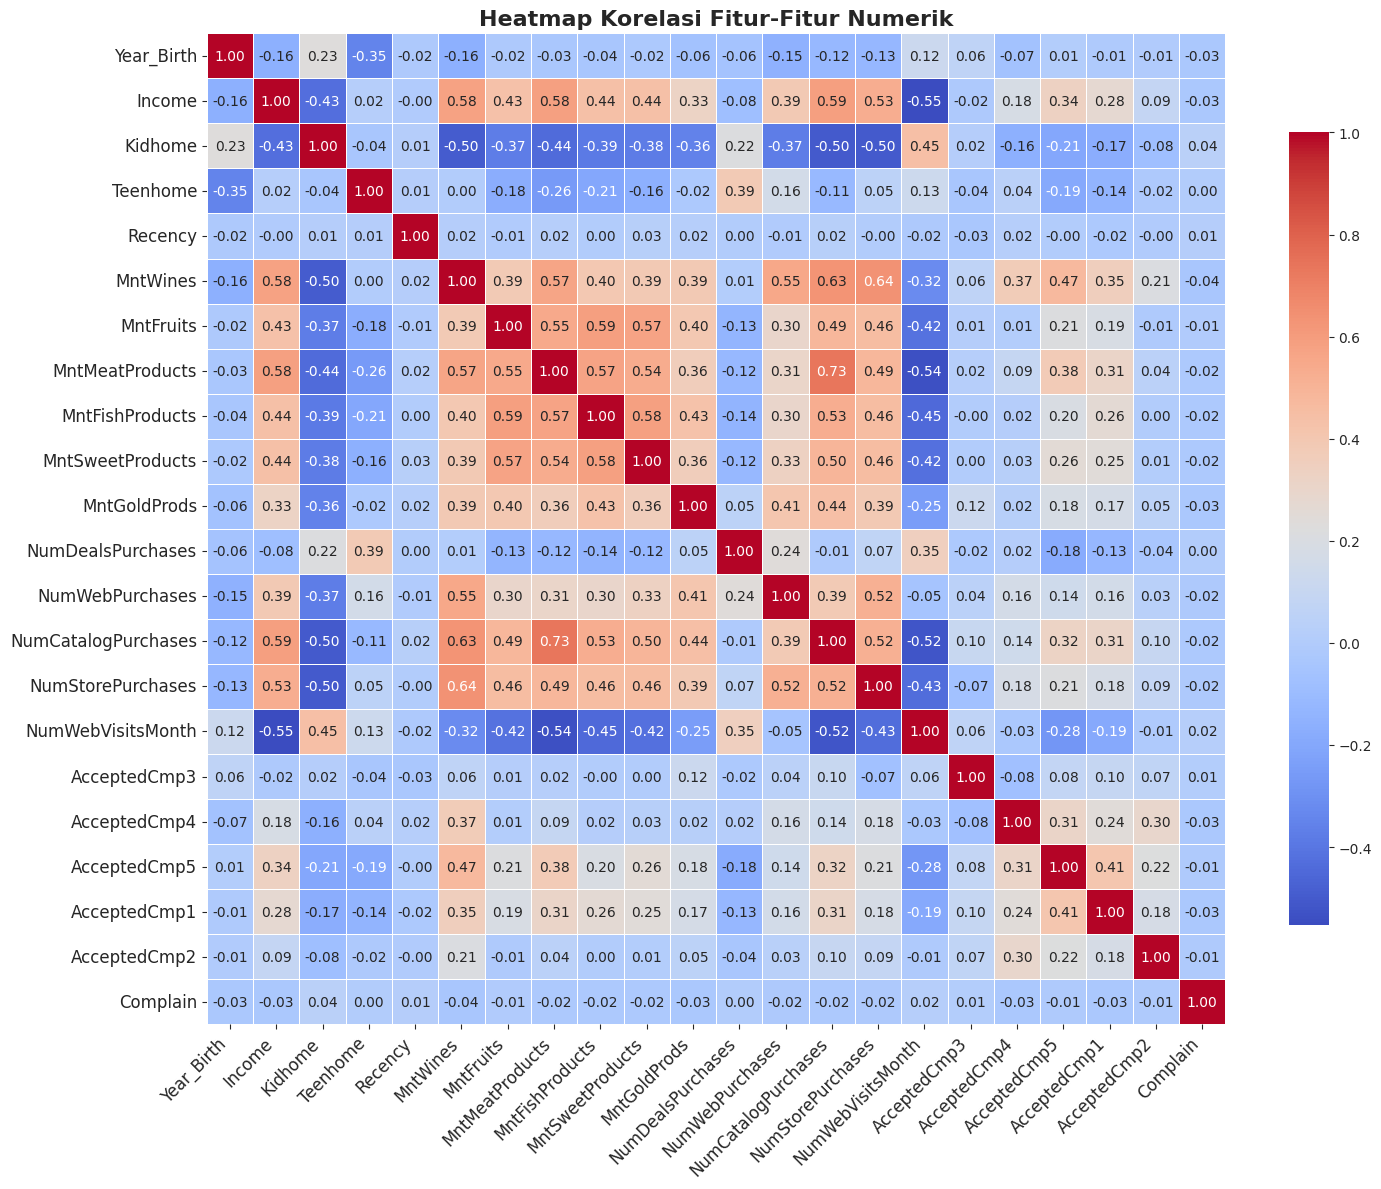

In [ ]:
# Membuat Heatmap Correlation
df_num_corr = df[nums].corr()

# Menentukan ukuran figure yang lebih besar untuk tampilan lebih baik
plt.figure(figsize=(15, 12))  # Ukuran figure yang lebih besar

# Membuat heatmap dengan beberapa parameter tambahan untuk merapikan tampilannya
sns.heatmap(df_num_corr,
            annot=True,             # Menampilkan nilai korelasi pada setiap sel
            cmap='coolwarm',        # Warna dari heatmap
            linewidths=0.5,         # Lebar garis antar sel
            fmt=".2f",              # Format desimal untuk angka korelasi
            annot_kws={"size": 10}, # Ukuran font anotasi
            cbar_kws={'shrink': 0.8}) # Menyusutkan ukuran colorbar

# Rotasi label x dan y agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotasi dan ukuran font untuk label sumbu x
plt.yticks(fontsize=12)  # Ukuran font untuk label sumbu y

# Menambahkan judul untuk heatmap
plt.title('Heatmap Korelasi Fitur-Fitur Numerik', fontsize=16, weight='bold')

# Menampilkan heatmap
plt.tight_layout()  # Menyusun layout agar rapi dan tidak tumpang tindih
plt.show()

### Intepretasi
Feature Selection yang dilakukan oleh kelompok kami adalah dengan menghapus variabel yang dirasa tidak relevan dengan variabel target.
1. "ID" variabel ID dirasa tidak relevan dengan variabel response karena berisi data unik seluruh customer
2. "Z_CostContact" variabel ini tidak relevan dengan variabel target karena jika dilihat isinya variabel ini hanya memiliki 1 data unik yaitu "11"
3. "Z_Revenue" variabel ini sama dengan variabel "Z_CostContact" yang hanya berisi 1 data unik, bedanya variabel ini isinya "3"

## Feature Extraction

In [ ]:
# Membuat kolom have child
df['have_child'] = df['Kidhome'] + df['Teenhome']

In [ ]:
# Membuat kolom total jumlah pembelian pelanggan
df['sum_of_amount'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [ ]:
# Membuat kolom Apakah pelanggan pernah menerima campaign
df['Acc_Cmp'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']
df['Acc_Cmp'] = np.where(df['Acc_Cmp']>1,1,df['Acc_Cmp'])
df['Acc_Cmp'].unique()

array([0, 1])

In [ ]:
# Membuat Kolom Age
df['Age'] = 2024 - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,have_child,sum_of_amount,Acc_Cmp,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,0,1617,0,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,2,27,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,776,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,1,53,0,40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,1,422,0,43


Kolom-kolom Ekstraksi sudah masuk dalam df

## Feature Tambahan
1. Harga Produk.
2. Besaran diskon.
3. Tingkat Pengeluaran (Spending_Level).
4. Umur Pelanggan.